<a href="https://colab.research.google.com/github/Hassan7838/feature-optimization-rfe/blob/main/feature-optimization-rfe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Feature Optimization for Classification Problems using Recursive Feature Elimination (RFE)

# Upload DataSet
from google.colab import files
upload = files.upload()

Saving train.csv to train (2).csv


In [ ]:
# Getting DataSet
import pandas as pd
df = pd.read_csv('train.csv')

# Preview Data
print('---First Five Rows---')
print(df.head())
print('---Information---')
print(df.info())
print('---Missing Values---')
print(df.isnull().sum())

---First Five Rows---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.05

In [ ]:
# Preprocess DataSet
df = df.drop(["PassengerId","Name","Ticket","Cabin"], axis=1)

# Fill Missing Values
df["Age"].fillna(df["Age"].median(),inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

# Encode Categorical To Numerical
df["Sex"] = df["Sex"].map({"male":0,"female":1})
df["Embarked"] = df["Embarked"].map({"S":1,"C":2,"Q":3})

# Checking dataSet
print(df.isnull().sum())
print(df.head())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    0  22.0      1      0   7.2500         1
1         1       1    1  38.0      1      0  71.2833         2
2         1       3    1  26.0      0      0   7.9250         1
3         1       1    1  35.0      1      0  53.1000         1
4         0       3    0  35.0      0      0   8.0500         1


/tmp/ipython-input-2127395212.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(),inplace=True)
/tmp/ipython-input-2127395212.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:
# Train/Test Split + RFECV
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV

# Split into Train & Test
X = df.drop(["Survived"],axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

# Decision Tree Model
tree_clf = DecisionTreeClassifier(random_state=1)

# Cross Validation
cv = StratifiedKFold(n_splits=5)

# RFECV
selector = RFECV(
    estimator = tree_clf,
    step=1,
    cv=cv,
    scoring='accuracy'
)

selector.fit(X_train,y_train)

# Results
print("Optimal Number of Features", selector.n_features_)
print("Selected features", X_train.columns[selector.support_].tolist())

Optimal Number of Features 4
Selected features ['Pclass', 'Sex', 'Age', 'Fare']


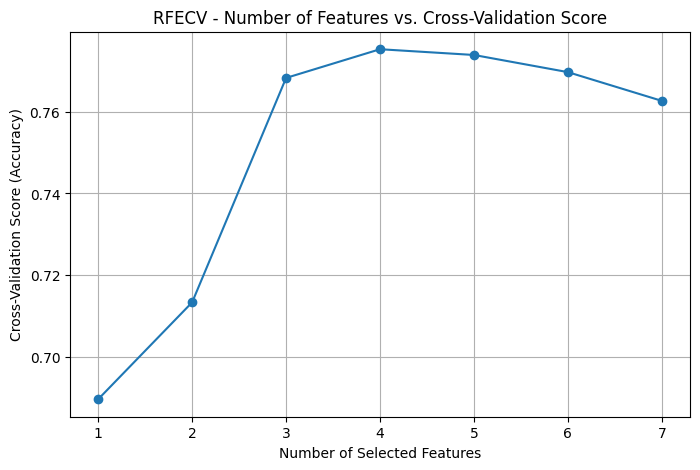

In [ ]:
# Reason behind choosing these four features as optimal features
import matplotlib.pyplot as plt

# Plot number of features vs. cross-validation score
plt.figure(figsize=(8, 5))
plt.title("RFECV - Number of Features vs. Cross-Validation Score")
plt.xlabel("Number of Selected Features")
plt.ylabel("Cross-Validation Score (Accuracy)")

plt.plot(range(1, len(selector.cv_results_['mean_test_score']) + 1),selector.cv_results_['mean_test_score'], marker='o')

plt.grid(True)
plt.show()


In [ ]:
# Train Baseline Model and Optimized Model and
# compare both using performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Baseline Model (All Features)
baseline_model = DecisionTreeClassifier(random_state=1)
baseline_model.fit(X_train, y_train)
baseline_preds = baseline_model.predict(X_test)

# Optimized Model (Selected Features)
selected_features = X_train.columns[selector.support_]
optimized_model = DecisionTreeClassifier(random_state=1)
optimized_model.fit(X_train[selected_features], y_train)
optimized_preds = optimized_model.predict(X_test[selected_features])

# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print("Accuracy: {:.2f}".format(accuracy_score(y_true, y_pred)))
    print("Precision: {:.2f}".format(precision_score(y_true, y_pred)))
    print("Recall: {:.2f}".format(recall_score(y_true, y_pred)))
    print("F1 Score: {:.2f}".format(f1_score(y_true, y_pred)))

# Evaluate both models
evaluate_model(y_test, baseline_preds, "Baseline Model (All 7 Features)")
evaluate_model(y_test, optimized_preds, "Optimized Model (4 Features)")


--- Baseline Model (All 7 Features) ---
Accuracy: 0.78
Precision: 0.76
Recall: 0.66
F1 Score: 0.71

--- Optimized Model (4 Features) ---
Accuracy: 0.77
Precision: 0.76
Recall: 0.64
F1 Score: 0.70


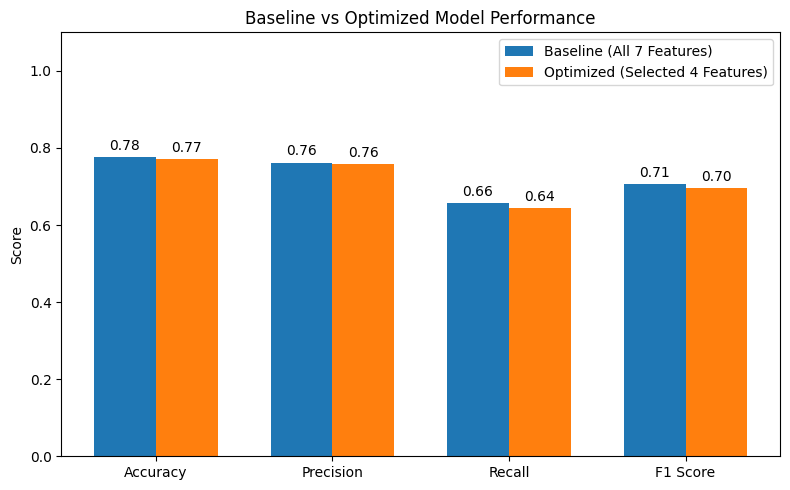

In [ ]:
import numpy as np

# Collect metrics into arrays
metrics_names = ["Accuracy", "Precision", "Recall", "F1 Score"]

baseline_scores = [
    accuracy_score(y_test, baseline_preds),
    precision_score(y_test, baseline_preds),
    recall_score(y_test, baseline_preds),
    f1_score(y_test, baseline_preds)
]

optimized_scores = [
    accuracy_score(y_test, optimized_preds),
    precision_score(y_test, optimized_preds),
    recall_score(y_test, optimized_preds),
    f1_score(y_test, optimized_preds)
]

# Create bar plot
x = np.arange(len(metrics_names))  # label positions
width = 0.35  # bar width

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, baseline_scores, width, label='Baseline (All 7 Features)')
rects2 = ax.bar(x + width/2, optimized_scores, width, label='Optimized (Selected 4 Features)')

# Labels and formatting
ax.set_ylabel('Score')
ax.set_title('Baseline vs Optimized Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.set_ylim(0, 1.1)
ax.legend()

# Add value labels
for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()